In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import scipy 
import math 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as mplt

In [2]:
#Leer archivo y mostrarlo
df=pd.read_csv("2b.txt", header=None, delimiter=r"\s+",names= ['Año','Mes','Año-Mes','Manchas','X','Y'])
df.head(10)

,Año,Mes,Año-Mes,Manchas,X,Y
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1
5,1749,6,1749.455,139.2,-1.0,-1
6,1749,7,1749.538,158.0,-1.0,-1
7,1749,8,1749.623,110.5,-1.0,-1
8,1749,9,1749.707,126.5,-1.0,-1
9,1749,10,1749.790,125.8,-1.0,-1


In [3]:
#convertimos a csv
df.to_csv('2bb.csv',index=False)

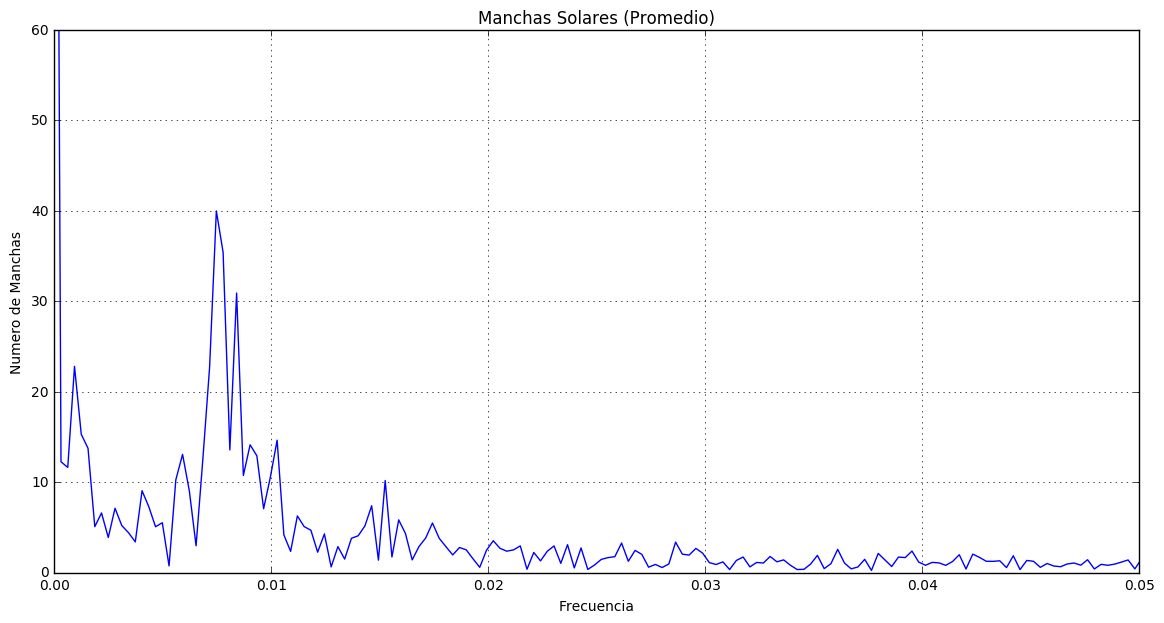

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift, rfft

N= 3213
T = 1.0
y = df["Manchas"] 
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N *abs(yplot))
plt.xlim(0,0.05)
plt.ylim(0,60)
plt.grid(True)

plt.xlabel('Frecuencia')
plt.ylabel('Numero de Manchas')
plt.title('Manchas Solares (Promedio)')
#plt.text(0.007,41,'11.15 años')

fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.show()

In [5]:
#mostrar valores complejos de transformada
yf/1606.5

array([ 165.84712107 +0.j        ,    7.63698503 +9.56584339j,
         -1.97516571+11.45744489j, ...,   -3.63218840+22.50799815j,
         -1.97516571-11.45744489j,    7.63698503 -9.56584339j])

In [6]:
#valores reales:
b= np.absolute(yf/1606.5)

In [7]:
#amplitudes mayores a 30
b[b[:,] > 30]

array([ 165.84712107,   39.98723321,   35.419832  ,   30.90803788,
         30.90803788,   35.419832  ,   39.98723321])

In [8]:
#Mostrarlas
print(np.where(b[:,]>30))
c= b[b[:,]>30]
c

(array([   0,   24,   25,   27, 3186, 3188, 3189]),)


array([ 165.84712107,   39.98723321,   35.419832  ,   30.90803788,
         30.90803788,   35.419832  ,   39.98723321])

In [9]:
N/2

1606.5

In [10]:
#Encontrar 
F1=xf[int(1606.5 + 24),]
F2=xf[int(1606.5+25),]
F3=xf[int(1606.5+27)]

In [11]:
#Estandarizar con las unidades
print('Periodo:',1/(F1*12), 'Años')
print('Otros periodos cercanos:','|',1/(F2*12),'años|',1/(F3*12),'años')

Periodo: 11.15625 Años
Otros periodos cercanos: | 10.71 años| 9.91666666667 años


In [12]:
print()
print('Primer Armónico')
print('Amplitud=',np.absolute(yf[0,]/3213))
print('frecuencia=', xf[int(1606.5 +0),])
print('periodo=', 1/xf[int(1606.5 +0),])

print()
print('Segundo armónico')
print('Amplitud=',np.absolute(yf[24,]/3213))
print('frecuencia=', xf[int(1606.5 +24),])
print('periodo=', 1/xf[int(1606.5 +24),])

print()
print('Segundo armónico')
print('Amplitud=',np.absolute(yf[25,]/3213))
print('frecuencia=', xf[int(1606.5 +25),])
print('periodo=', 1/xf[int(1606.5 +25),])

print()
print('Tercer armónico')
print('Amplitud=',np.absolute(yf[27,]/3213))
print('frecuencia=', xf[int(1606.5 +27),])
print('periodo=', 1/xf[int(1606.5 +27),])


Primer Armónico
Amplitud= 82.9235605353
frecuencia= 0.0
periodo= inf

Segundo armónico
Amplitud= 19.9936166043
frecuencia= 0.00746965452848
periodo= 133.875

Segundo armónico
Amplitud= 17.7099160016
frecuencia= 0.00778089013383
periodo= 128.52

Tercer armónico
Amplitud= 15.4540189405
frecuencia= 0.00840336134454
periodo= 119.0


In [13]:
A1=np.angle(yf[24,]/3213)
A1

0.56801906848676587